In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


print("✅ Libraries imported.")


✅ Libraries imported.


In [2]:
# Replace with your actual CSV file name if different
csv_file = 'pubg.csv'
df = pd.read_csv(csv_file)

print("✅ Data loaded. Shape:", df.shape)
df.head()


✅ Data loaded. Shape: (4446966, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with missing target
df.dropna(subset=['winPlacePerc'], inplace=True)

print("✅ Cleaned data. Shape:", df.shape)

✅ Cleaned data. Shape: (4446965, 29)


In [5]:
id_cols = ['Id', 'groupId', 'matchId']

for col in id_cols:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

print("✅ Columns after dropping IDs:", df.columns.tolist())

✅ Columns after dropping IDs: ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']


In [6]:
if 'matchType' in df.columns:
    df = pd.get_dummies(df, columns=['matchType'], drop_first=True)
    print("✅ Encoded matchType. New columns:", df.columns.tolist())
else:
    print("⚠️ matchType column not found. Skipping encoding.")


✅ Encoded matchType. New columns: ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc', 'matchType_crashtpp', 'matchType_duo', 'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp', 'matchType_normal-duo', 'matchType_normal-duo-fpp', 'matchType_normal-solo', 'matchType_normal-solo-fpp', 'matchType_normal-squad', 'matchType_normal-squad-fpp', 'matchType_solo', 'matchType_solo-fpp', 'matchType_squad', 'matchType_squad-fpp']


In [7]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("⚠️ Dropping non-numeric columns:", non_numeric_cols.tolist())
    df.drop(non_numeric_cols, axis=1, inplace=True)
else:
    print("✅ All columns are numeric.")


✅ All columns are numeric.


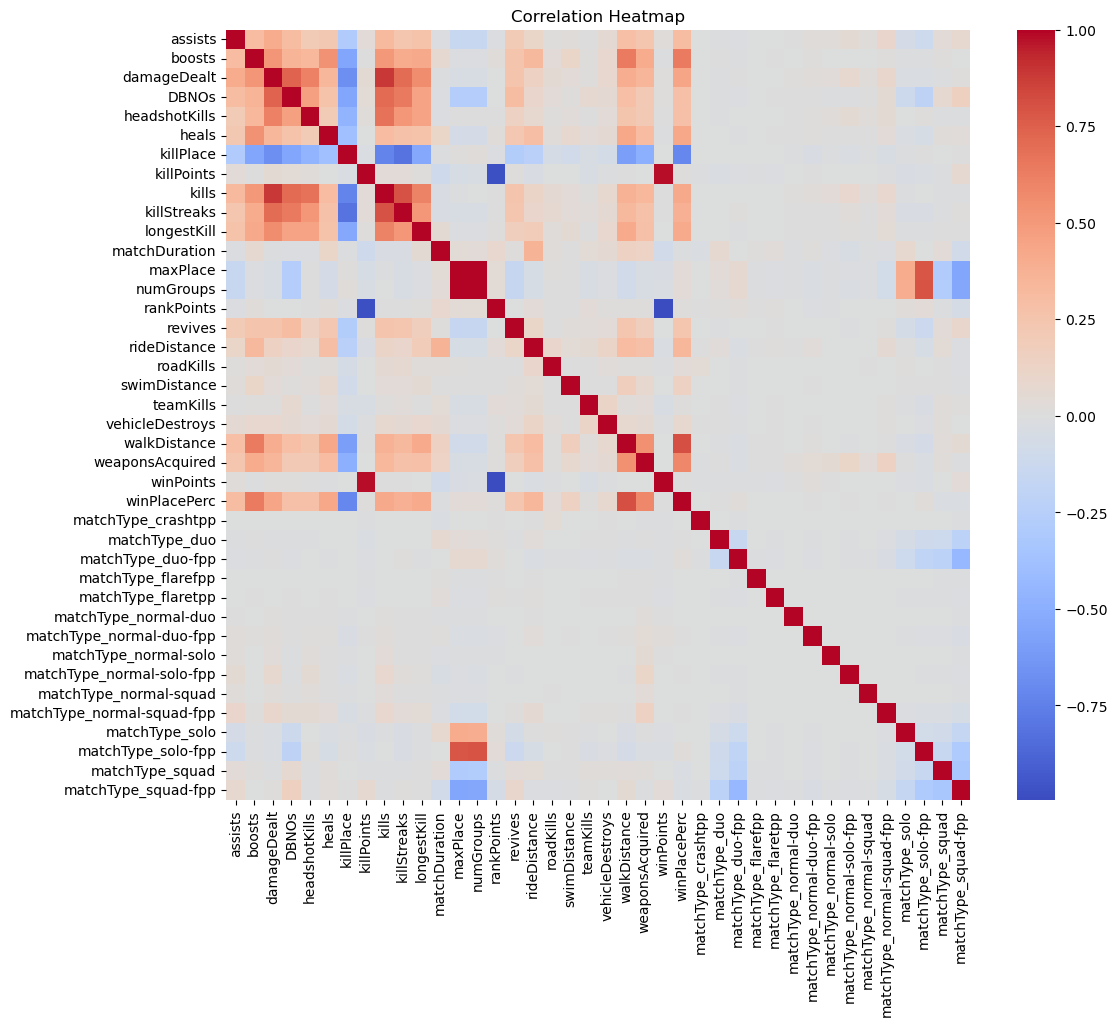

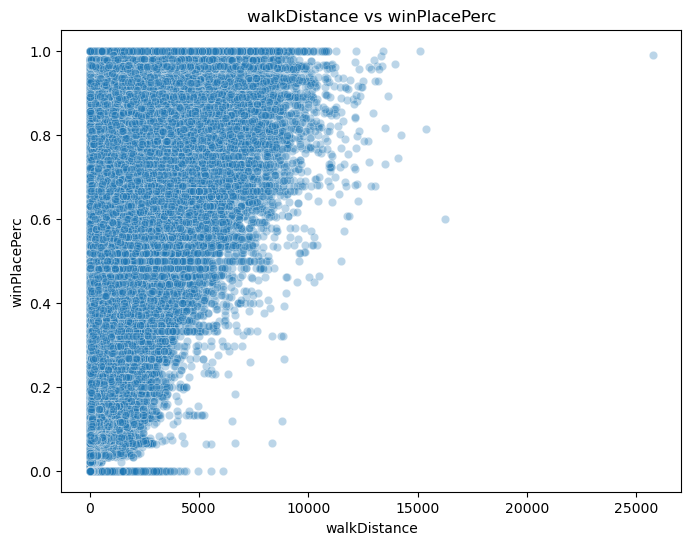

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

if 'walkDistance' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='walkDistance', y='winPlacePerc', data=df, alpha=0.3)
    plt.title('walkDistance vs winPlacePerc')
    plt.show()


In [9]:
X = df.drop('winPlacePerc', axis=1)
y = df['winPlacePerc']

print("✅ Features and target defined.")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Features and target defined.
X shape: (4446965, 39)
y shape: (4446965,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Train/Test split done.")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


✅ Train/Test split done.
Train shape: (3557572, 39)
Test shape: (889393, 39)


In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"✅ Linear Regression - MAE: {mae_lr:.4f}, R2: {r2_lr:.4f}")


✅ Linear Regression - MAE: 0.0899, R2: 0.8399


In [12]:
dt = DecisionTreeRegressor(random_state=42, max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"✅ Decision Tree - MAE: {mae_dt:.4f}, R2: {r2_dt:.4f}")


✅ Decision Tree - MAE: 0.0692, R2: 0.8979


In [13]:


from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=25,    # reduced from 50
    max_depth=5,        # slightly shallower
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"✅ Random Forest Regressor MAE: {mae:.4f}")
print(f"✅ Random Forest Regressor R2 Score: {r2:.4f}")



✅ Random Forest Regressor MAE: 0.0872
✅ Random Forest Regressor R2 Score: 0.8442


In [15]:
print("📊 Model Comparison:")
print(f"Linear Regression - MAE: {mae_lr:.4f}, R2: {r2_lr:.4f}")
print(f"Decision Tree     - MAE: {mae_dt:.4f}, R2: {r2_dt:.4f}")
print(f"Random Forest     - MAE: {mae:.4f}, R2: {r2:.4f}")

📊 Model Comparison:
Linear Regression - MAE: 0.0899, R2: 0.8399
Decision Tree     - MAE: 0.0692, R2: 0.8979
Random Forest     - MAE: 0.0872, R2: 0.8442


In [17]:
print("""
🚀 Challenges Faced:
1. Missing Values - Rows with missing winPlacePerc were dropped.
2. ID Columns - Dropped non-predictive identifiers like Id, groupId, matchId.
3. Non-Numeric Data - Ensured all features were numeric.
4. Categorical Encoding - Encoded matchType with one-hot encoding.
5. Outliers - Not removed in this basic model but recommended for production.
""")


🚀 Challenges Faced:
1. Missing Values - Rows with missing winPlacePerc were dropped.
2. ID Columns - Dropped non-predictive identifiers like Id, groupId, matchId.
3. Non-Numeric Data - Ensured all features were numeric.
4. Categorical Encoding - Encoded matchType with one-hot encoding.
5. Outliers - Not removed in this basic model but recommended for production.

